In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Path to your shapefile (.shp)
shp_path = r"Data\Aus Shap File\STE_2021_AUST_GDA2020.shp"

# Read shapefile
aus_states = gpd.read_file(shp_path)

# Quick check
print(aus_states.head())
print(aus_states.columns)


  STE_CODE21         STE_NAME21 CHG_FLAG21  CHG_LBL21 AUS_CODE21 AUS_NAME21  \
0          1    New South Wales          0  No change        AUS  Australia   
1          2           Victoria          0  No change        AUS  Australia   
2          3         Queensland          0  No change        AUS  Australia   
3          4    South Australia          0  No change        AUS  Australia   
4          5  Western Australia          0  No change        AUS  Australia   

     AREASQKM21                                       LOCI_URI21  \
0  8.007977e+05  http://linked.data.gov.au/dataset/asgsed3/STE/1   
1  2.274962e+05  http://linked.data.gov.au/dataset/asgsed3/STE/2   
2  1.730171e+06  http://linked.data.gov.au/dataset/asgsed3/STE/3   
3  9.842314e+05  http://linked.data.gov.au/dataset/asgsed3/STE/4   
4  2.526632e+06  http://linked.data.gov.au/dataset/asgsed3/STE/5   

                                            geometry  
0  MULTIPOLYGON (((159.0623 -31.50886, 159.06218 ...  
1  MUL

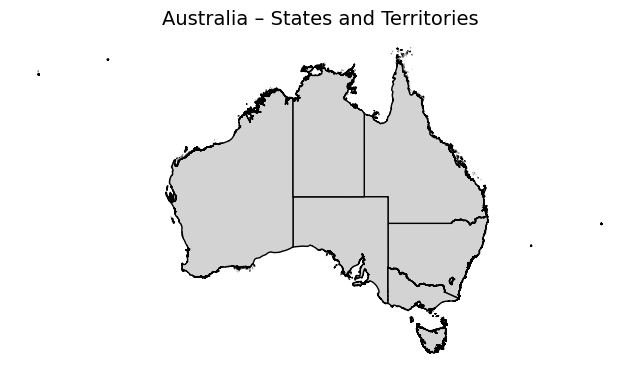

In [2]:
fig, ax = plt.subplots(figsize=(8, 8))

aus_states.plot(
    ax=ax,
    edgecolor="black",
    facecolor="lightgrey"
)

ax.set_title("Australia – States and Territories", fontsize=14)
ax.axis("off")

plt.show()


<>:6: SyntaxWarning: invalid escape sequence '\A'
<>:6: SyntaxWarning: invalid escape sequence '\A'
C:\Users\Jspch\AppData\Local\Temp\ipykernel_16880\2645380938.py:6: SyntaxWarning: invalid escape sequence '\A'
  gdf = gpd.read_file("Data\Aus Shap File\STE_2021_AUST_GDA2020.shp")


EPSG:7844


C:\Users\Jspch\AppData\Local\Temp\ipykernel_16880\2645380938.py:50: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(frameon=False, loc="lower left")
C:\Users\Jspch\AppData\Local\Temp\ipykernel_16880\2645380938.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False, loc="lower left")


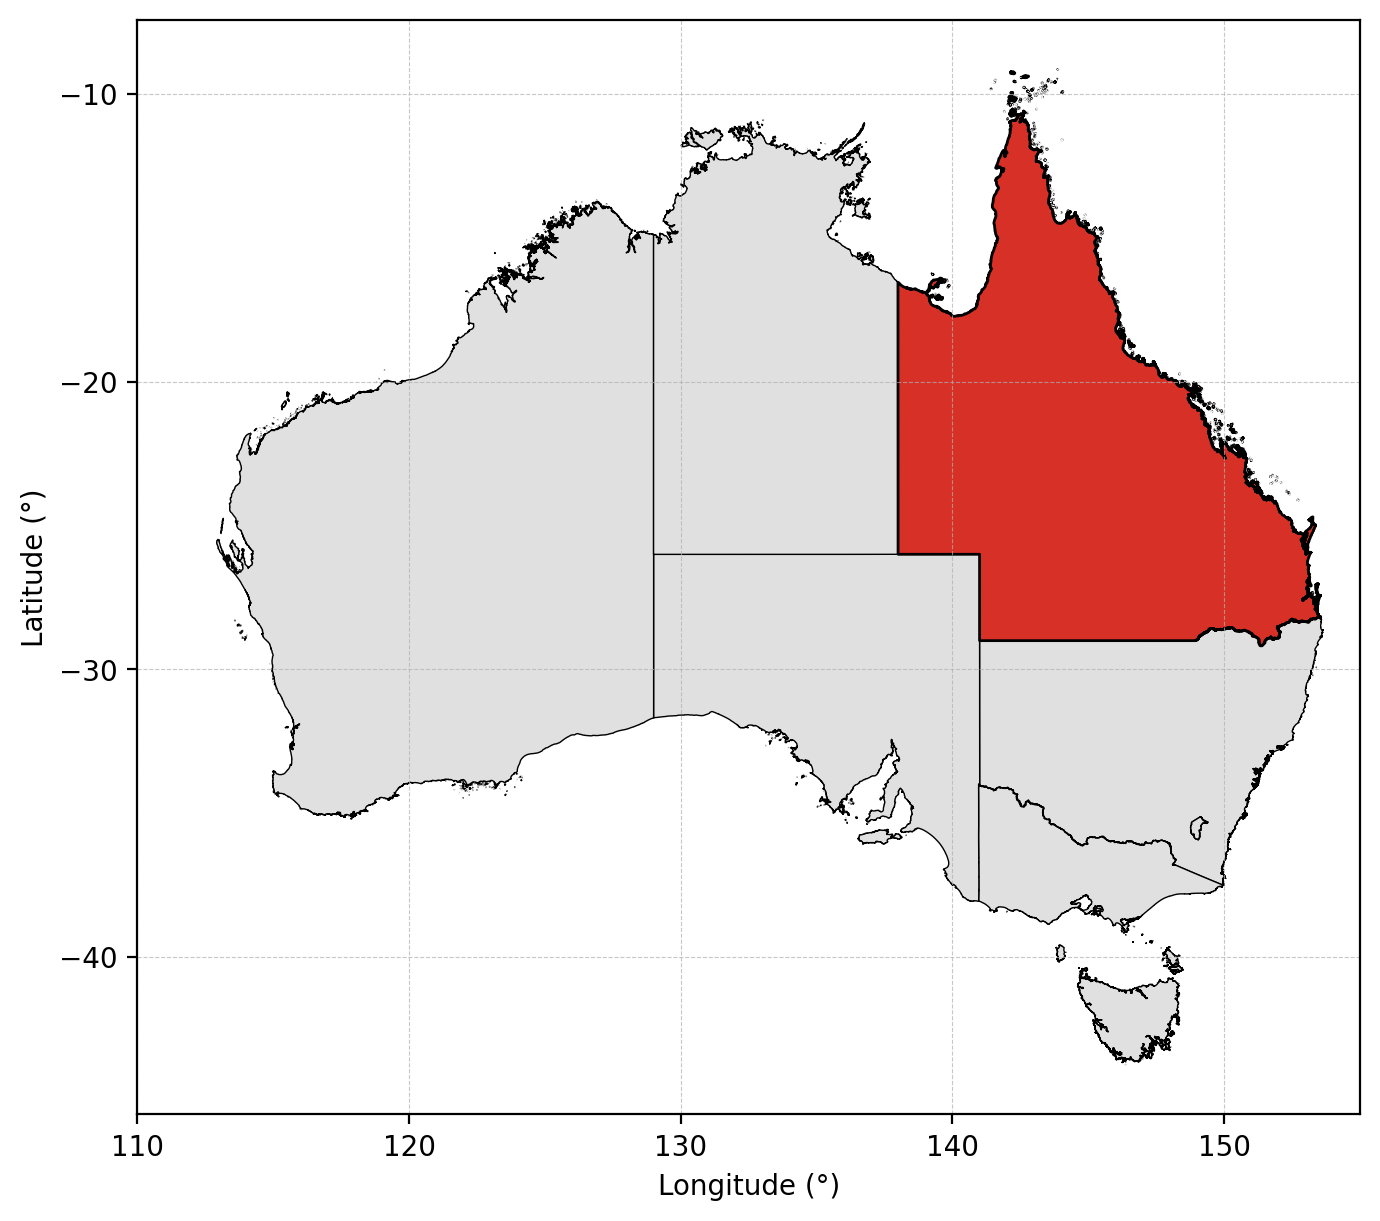

In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box
import matplotlib.ticker as mticker

gdf = gpd.read_file("Data\Aus Shap File\STE_2021_AUST_GDA2020.shp")

print(gdf.crs)
# If None, uncomment the next line
# gdf = gdf.set_crs(epsg=4326)

qld = gdf[gdf["STE_NAME21"] == "Queensland"]
others = gdf[gdf["STE_NAME21"] != "Queensland"]

fig, ax = plt.subplots(figsize=(7, 7), dpi=200)

# Plot other states
others.plot(
    ax=ax,
    color="#E0E0E0",
    edgecolor="black",
    linewidth=0.5
)

# Highlight Queensland
qld.plot(
    ax=ax,
    color="#D73027",   # strong but journal-safe red
    edgecolor="black",
    linewidth=1.0,
    label="Queensland"
)

# ---- LIMIT LONGITUDE ----
ax.set_xlim(110, 155)

# Title
# ax.set_title("Australia States and Territories (Queensland Highlighted)",
            #  fontsize=12)

# Latitude / Longitude grid
ax.set_xlabel("Longitude (°)", fontsize=10)
ax.set_ylabel("Latitude (°)", fontsize=10)

ax.xaxis.set_major_locator(mticker.MultipleLocator(10))
ax.yaxis.set_major_locator(mticker.MultipleLocator(10))

ax.grid(True, linestyle="--", linewidth=0.4, alpha=0.7)

ax.legend(frameon=False, loc="lower left")

plt.tight_layout()
plt.show()




C:\Users\Jspch\AppData\Local\Temp\ipykernel_16880\3999842112.py:76: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(frameon=False, loc="lower left", fontsize=9)
C:\Users\Jspch\AppData\Local\Temp\ipykernel_16880\3999842112.py:76: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False, loc="lower left", fontsize=9)


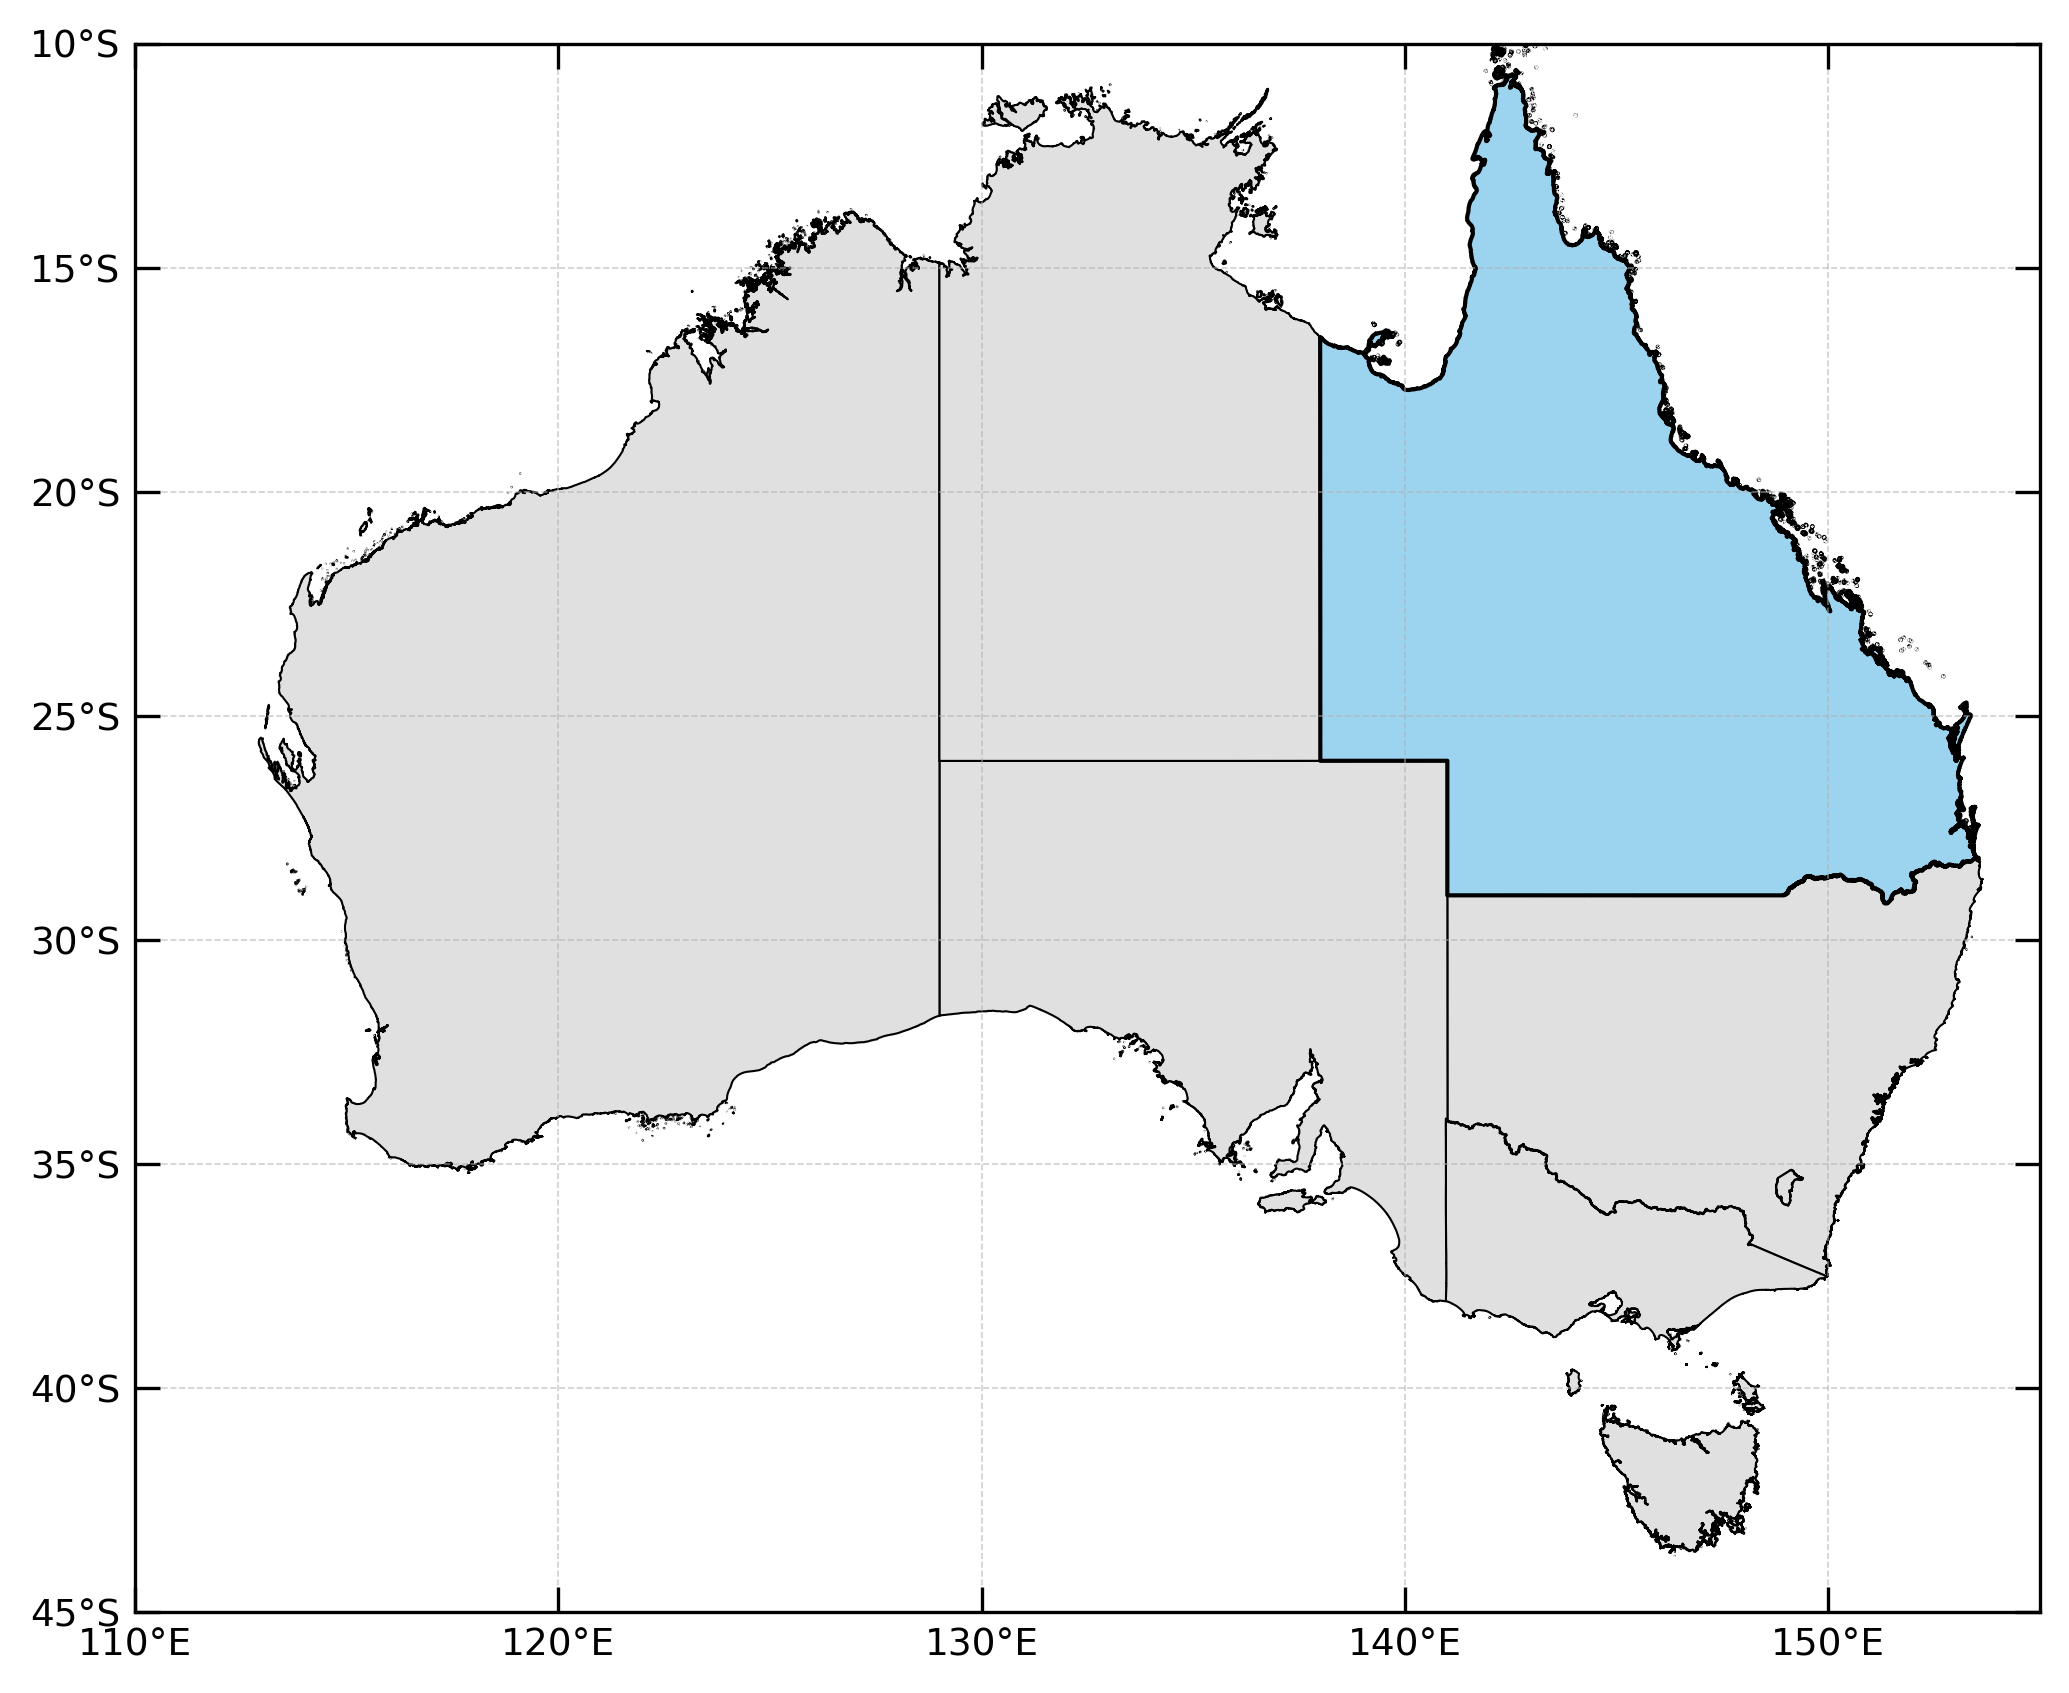

In [20]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.ticker import FuncFormatter

# -----------------------------
# Read shapefile
# -----------------------------
gdf = gpd.read_file(r"Data\Aus Shap File\STE_2021_AUST_GDA2020.shp")

qld = gdf[gdf["STE_NAME21"] == "Queensland"]
others = gdf[gdf["STE_NAME21"] != "Queensland"]

fig, ax = plt.subplots(figsize=(7, 7), dpi=300)

# -----------------------------
# Plot states
# -----------------------------
others.plot(
    ax=ax,
    color="#E0E0E0",
    edgecolor="black",
    linewidth=0.5
)

qld.plot(
    ax=ax,
    color="#9cd3ee",
    edgecolor="black",
    linewidth=1.0,
    label="Queensland"
)

# -----------------------------
# Map extent
# -----------------------------
ax.set_xlim(110, 155)
ax.set_ylim(-45, -10)

# -----------------------------
# Degree-style tick labels (like your picture)
# -----------------------------
def lon_formatter(x, pos):
    return f"{int(abs(x))}°E"

def lat_formatter(y, pos):
    return f"{int(abs(y))}°S"

ax.xaxis.set_major_locator(mticker.MultipleLocator(10))
ax.yaxis.set_major_locator(mticker.MultipleLocator(5))

ax.xaxis.set_major_formatter(FuncFormatter(lon_formatter))
ax.yaxis.set_major_formatter(FuncFormatter(lat_formatter))

# -----------------------------
# Axis appearance (same style as image)
# -----------------------------
ax.tick_params(
    axis="both",
    direction="in",
    length=6,
    width=0.8,
    labelsize=9,
    top=True,
    right=True
)

# -----------------------------
# Grid (subtle)
# -----------------------------
ax.grid(True, linestyle="--", linewidth=0.4, alpha=0.6)

# -----------------------------
# Legend
# -----------------------------
ax.legend(frameon=False, loc="lower left", fontsize=9)

plt.tight_layout()
plt.show()
